### Week 7 Reflection 


##### 1. How does the tf-idf weight distribution (computed for Question 2 on Week 2) differ between non-stemmed and stemmed versions of one same set of documents? Is there a visually identifiable difference (in their histograms)? Can a statistical test tell them apart?

In [4]:
!pip install gutenbergpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29269 sha256=a9d86932f138adf7f3a253f34a38ff703e9c096e6e0e8aff89ea7c3a9e28e879
  Stored in directory: /root/.cache/pip/wheels/91/04/37/b7080e0cfe33a8bc79ff0082159cea767f9145a5a713b501a3
Successfully built httpsproxy-urllib2


In [5]:
target = 22367 # Ebook number
import gutenbergpy.textget
raw = gutenbergpy.textget.get_text_by_id(target)
book= gutenbergpy.textget.strip_headers(raw)
count = 50

In [6]:
s = book.decode("utf-8") # get a string from the byte sequence
startmarker = '1917'
endmarker = 'Tochter als erste sich erhob und ihren jungen Körper dehnte.'
startPosition = s.index(startmarker) + len(startmarker)
endPosition = s.index(endmarker)+len(endmarker)
content = s[startPosition:endPosition]
# print(content[:count]) # start
# print(content[-count:]) # end

In [7]:
import re
# extract Roman Numerals and replace them with 'ROMAN' by using Regular Expression
text = re.sub(r'(?=\b[MCDXLVI]{1,6}\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})', 'ROMAN', content)
#print(text)

In [8]:
# count the number of sections
sections = text.count('ROMAN')
# removing the sections headers
# print('No digits:', sections)
clean = re.compile(r'\s+') # also combine any kind of repeated whitespace into a single space
ok = clean.sub(' ', text)
# print('Cleaned:', ok[:count])
potential = ok.split('ROMAN.')
stripped = [ candidate.strip().lstrip() for candidate in potential ] # remove leading and trailing space 
real = [ s for s in stripped if len(s) > 0 ] # keep only the ones with content
# print(len(real), 'real chapters')
# print(real[0][:count])

In [9]:
# convert list to a string
real_text = ' '
for x in real:
    real_text += ' ' + x

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
skip = stopwords.words('german')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
wordsFiltered = []
for w in real_text.split():
    if w not in skip:
        wordsFiltered.append(w)


In [12]:
neuer_Korpus = ' '
for x in wordsFiltered:
    neuer_Korpus += ' ' + x

In [13]:
import nltk
from nltk import tokenize
nltk.download('punkt')
texts = tokenize.sent_tokenize(neuer_Korpus)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above
vectorizer = TfidfVectorizer(min_df=10, max_features=10000)
vz = vectorizer.fit_transform(texts)

In [ ]:
import pandas as pd 
tfidf = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

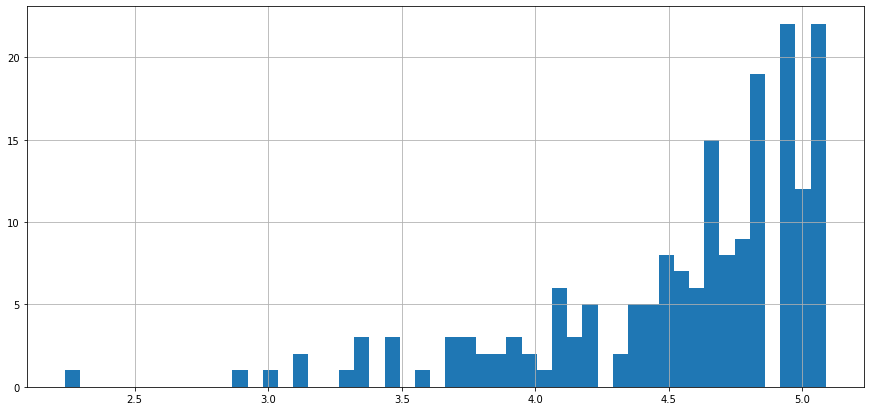

In [ ]:
tfidf.tfidf.hist(bins=50, figsize=(15,7))

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(3)

,tfidf
übrigens,5.088266
kasten,5.088266
endlich,5.088266


In [15]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("german")
new_texts = stemmer.stem(neuer_Korpus)

In [ ]:
neuer_Korpus

"  Als Gregor Samsa Morgens unruhigen Träumen erwachte, fand Bett ungeheueren Ungeziefer verwandelt. Er lag panzerartig harten Rücken sah, Kopf wenig hob, gewölbten, braunen, bogenförmigen Versteifungen geteilten Bauch, Höhe Bettdecke, gänzlichen Niedergleiten bereit, kaum erhalten konnte. Seine vielen, Vergleich sonstigen Umfang kläglich dünnen Beine flimmerten hilflos Augen. »Was geschehen?« dachte er. Es Traum. Sein Zimmer, richtiges, kleines Menschenzimmer, lag ruhig vier wohlbekannten Wänden. Über Tisch, auseinandergepackte Musterkollektion Tuchwaren ausgebreitet -- Samsa Reisender --, hing Bild, kurzem illustrierten Zeitschrift ausgeschnitten hübschen, vergoldeten Rahmen untergebracht hatte. Es stellte Dame dar, die, Pelzhut Pelzboa versehen, aufrecht dasaß schweren Pelzmuff, ganzer Unterarm verschwunden war, Beschauer entgegenhob. Gregors Blick richtete Fenster, trübe Wetter -- hörte Regentropfen Fensterblech aufschlagen -- machte ganz melancholisch. »Wie wäre es, wenig weitersc

In [ ]:
new_texts

"  als gregor samsa morgens unruhigen traumen erwachte, fand bett ungeheueren ungeziefer verwandelt. er lag panzerartig harten rucken sah, kopf wenig hob, gewolbten, braunen, bogenformigen versteifungen geteilten bauch, hohe bettdecke, ganzlichen niedergleiten bereit, kaum erhalten konnte. seine vielen, vergleich sonstigen umfang klaglich dunnen beine flimmerten hilflos augen. »was geschehen?« dachte er. es traum. sein zimmer, richtiges, kleines menschenzimmer, lag ruhig vier wohlbekannten wanden. uber tisch, auseinandergepackte musterkollektion tuchwaren ausgebreitet -- samsa reisender --, hing bild, kurzem illustrierten zeitschrift ausgeschnitten hubschen, vergoldeten rahmen untergebracht hatte. es stellte dame dar, die, pelzhut pelzboa versehen, aufrecht dasass schweren pelzmuff, ganzer unterarm verschwunden war, beschauer entgegenhob. gregors blick richtete fenster, trube wetter -- horte regentropfen fensterblech aufschlagen -- machte ganz melancholisch. »wie ware es, wenig weiters

Visually, we can see that this stemme is not so good, because it didn't really do anything specifically besides removing the umlaut, changing to lowercase. They are Treetagger and Spacy, but Treetagger is difficult to install on Colab, and Spacy no longe supports German. 

In [ ]:
texts_stemmer = tokenize.sent_tokenize(new_texts)

In [ ]:
vz_stemmer = vectorizer.fit_transform(texts_stemmer)

In [ ]:
tfidf1 = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
tfidf1 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf1), orient='index')
tfidf1.columns = ['tfidf']

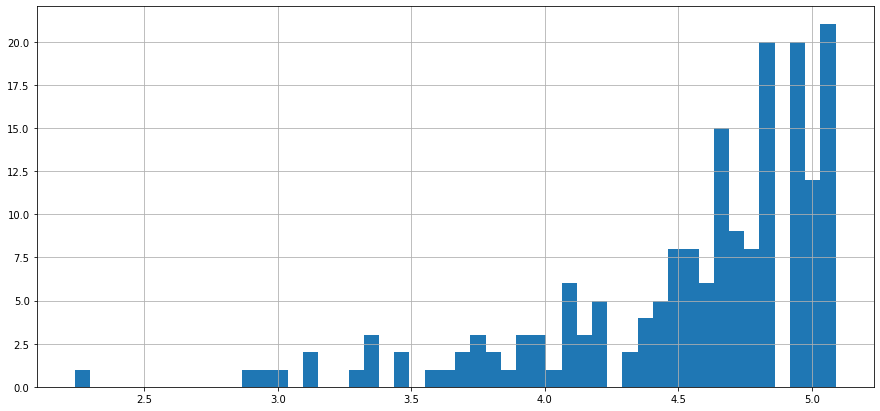

In [ ]:

tfidf1.tfidf.hist(bins=50, figsize=(15,7))


In [ ]:
tfidf1.sort_values(by=['tfidf'], ascending=False).head(3)

,tfidf
verlassen,5.088266
wohnzimmer,5.088266
wusste,5.088266


In [ ]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(tfidf.tfidf, tfidf1.tfidf)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.1299, p-value=0.8967


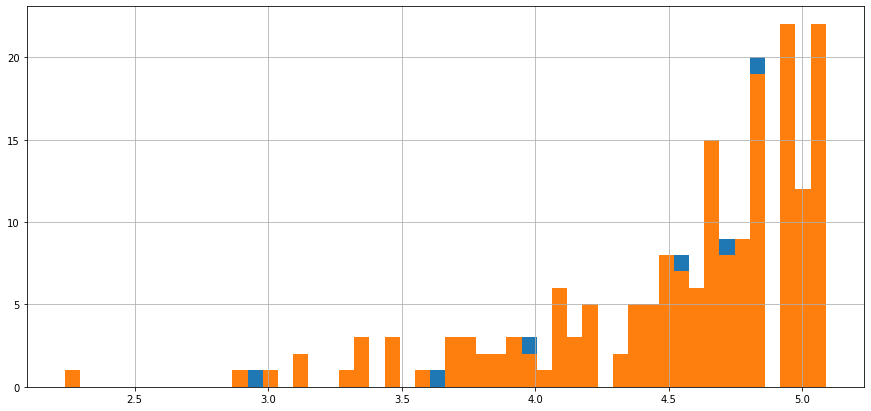

In [ ]:

tfidf1.tfidf.hist(bins=50, figsize=(15,7))
tfidf.tfidf.hist(bins=50, figsize=(15,7))

##### 2. What is the effect of the presence/absence of stemming in the proposed term/document similarity measures (Questions 2 & 3 of Week 2)? You can try it out and/or speculate about it on a conceptual level.

---



In [ ]:
!pip install simphile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# without stemming
text_a = ' '
for x in neuer_Korpus:
    text_a += ' ' + x

In [ ]:
# with stemming
text_b = ' '
for x in new_texts:
    text_b += ' ' + x

In [ ]:
from simphile import jaccard_similarity, euclidian_similarity, compression_similarity
'''Compression Similairty – leverages the pattern recognition of compression algorithms. 
Compression exploits patterns in data in order to compress the data. 
This method produces a text similarity score by using compression to find similar patterns in the compared documents'''
'''Euclidian Similarity – Treats text like points in multi-dimensional space and calculates their closeness.
Producing a similarity score of the comparison string to the reference string supplied in the initialization.'''
'''Jaccard Similairy – Texts are more similar the more their words overlap.Using the Jaccard Index, 
produces a similarity score of the comparison string to the reference string supplied in the initialization.'''
print(f"Jaccard Similarity: {jaccard_similarity(text_a, text_b)}")
print(f"Euclidian Similarity: {euclidian_similarity(text_a, text_b)}")
print(f"Compression Similarity: {compression_similarity(text_a, text_b)}")

Jaccard Similarity: 0.8414450067861537
Euclidian Similarity: 0.9856824943214716
Compression Similarity: 0.04686219451572593


#### 3. What happens to the proportion of words found in the sentiment lexicons (used on Week 3) when stemming or lemmatization is carried out versus when it is not? Do you expect this to affect NLP systems that seek to identify or quantify feelings?

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=82d047bac4a3864ba461ade7ad831095941b6670c68113d98398bf20317d8143
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
from afinn import Afinn
import pandas as pd
afn = Afinn(emoticons=True)
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')
afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None, # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value']) #new column names
seed = 999 
afinn_wl_df.sample(10, random_state = seed)

,term,value
1079,glamourous,3
1753,prblm,-2
2152,struggles,-2
2245,top,2
286,block,-1
2121,stimulates,1
29,accidental,-2
415,clever,2
2024,silencing,-1
1438,liked,2


In [ ]:
dataset = pd.read_csv('/content/movie_reviews (1).csv.bz2', compression='bz2')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import numpy as np
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# extract data for model evaluation
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [5000, 2500, 1000]

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*100)

REVIEW: First off I want to say that I lean liberal on the political scale and I found the movie offensive. I managed to watch the whole doggone disgrace of a film . This movie brings a low to original ideas. Yes it was original thus my 2 stars instead of 1. Are our film writers that uncreative that they can only come up with this?? Acting was horrible , and the characters were unlikeable for the most part. The lead lady in the story had no good qualities at all. They made her bf into some sort of a bad guy and I did not see that at all. Maybe I missed something , I do not know.He was the most down to earth, relevant character in the movie. I did not shell out any money for this garbage. I almost wish PETA would come to the rescue of this awful, offensive movie and form a protest. DISGUSTING thats all I have to say anymore !
Actual Sentiment: negative
Predicted Sentiment polarity: -14.0
----------------------------------------------------------------------------------------------------

In [ ]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.79      0.57      0.67      7490
    positive       0.67      0.85      0.75      7510

    accuracy                           0.71     15000
   macro avg       0.73      0.71      0.71     15000
weighted avg       0.73      0.71      0.71     15000



,negative,positive
negative,4301,3189
positive,1134,6376


In [ ]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer

ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer('english')

rs = RegexpStemmer('ing$|s$|ed$|y$', min=4) # set the minimum of the string to stem

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
all = []
sam = [[i] for i in dataset['review'].tolist()]
for i in sam:
  # print(i)
  for j in i:
    # print(j.split())
    a = [ls.stem(w) for w in j.split()]
    # print(a)
    b = ' '.join(a)
    # print(b)
    all.append(b)

In [ ]:

reviews1=np.array(all)
sentiments = np.array(dataset['sentiment'])
# extract data for model evaluation
test_reviews1 = reviews1[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [5000, 2500, 1000]

In [ ]:
for review1, sentiment1 in zip(test_reviews1[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review1)
    print('Actual Sentiment:', sentiment1)
    print('Predicted Sentiment polarity:', afn.score(review1))
    print('-'*100)

REVIEW: first off i want to say that i lean lib on the polit scal and i found the movy offensive. i man to watch the whol doggon disgrac of a film . thi movy bring a low to origin ideas. ye it was origin thu my 2 star instead of 1. ar our film writ that uncr that they can on com up with this?? act was horr , and the charact wer unlik for the most part. the lead lady in the story had no good qual at all. they mad her bf into som sort of a bad guy and i did not see that at all. mayb i miss someth , i do not know.he was the most down to earth, relev charact in the movie. i did not shel out any money for thi garbage. i almost wish pet would com to the rescu of thi awful, offend movy and form a protest. disgust that al i hav to say anym !
Actual Sentiment: negative
Predicted Sentiment polarity: -17.0
----------------------------------------------------------------------------------------------------
REVIEW: "shower" is an story about loyalty, about the unstop adv of modern world in the detr

In [ ]:
sentiment_polarity1 = [afn.score(review1) for review1 in test_reviews1]
predicted_sentiments1 = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity1]

In [ ]:
print(classification_report(test_sentiments, predicted_sentiments1))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments1), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.71      0.69      0.70      7490
    positive       0.70      0.72      0.71      7510

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



,negative,positive
negative,5186,2304
positive,2136,5374


#### 4. What is the effect of using or not using stemming or lemmatization in the precision of n-gram taggers (Question 1 of Week 1)?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ng1 = CountVectorizer(ngram_range=(1, 1))
ng1 = vectorizer_ng1.fit_transform(all)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1, 2))
ng2 = vectorizer_ng2.fit_transform(all)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(all)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % 
      (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 95917, 2308823 and 8780784 features respectively


In [ ]:
X = all
y = dataset['sentiment']

In [ ]:
X1= dataset['review']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.25)

In [ ]:
X_train_ng1 = vectorizer_ng1.fit_transform(X_train)
X_test_ng1 = vectorizer_ng1.transform(X_test)

In [ ]:
X_train_ng2 = vectorizer_ng2.fit_transform(X_train)
X_test_ng2 = vectorizer_ng2.transform(X_test)

In [ ]:
X_train_ng3 = vectorizer_ng3.fit_transform(X_train)
X_test_ng3 = vectorizer_ng3.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create a MultinomialNB object
clf = MultinomialNB()
# Fit the classifier
clf.fit(X_train_ng1, y_train)
# Measure the accuracy
accuracy1 = clf.score(X_test_ng1, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy1)


The accuracy of the classifier on the test set is 0.846


In [ ]:
clf.fit(X_train_ng2, y_train)
accuracy2 = clf.score(X_test_ng2, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy2)

The accuracy of the classifier on the test set is 0.883


In [ ]:
clf.fit(X_train_ng3, y_train)
accuracy3 = clf.score(X_test_ng3, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy3)

The accuracy of the classifier on the test set is 0.897


##### 5. How are the transformer-based taggers affected by stemming or lemmatization (Question 3 of Week 4)?

In [2]:
! pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 28.8 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 788 kB 63.7 MB/s 
     |████████████████████████████████| 5.3 MB 43.0 MB/s 
     |████████████████████████████████| 981 kB 55.3 MB/s 
     |████████████████████████████████| 1.2 MB 61.3 MB/s 
     |████████████████████████████████| 19.7 MB 313 kB/s 
     |████████████████████████████████| 163 kB 68.5 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 56.1 MB/s 
     |████████████████████████████████| 200 kB 76.9 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 7.6 MB 63.9 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=7454a9f17eada8b7872f0d884c506e628de5fa03aabe91a6ee208012653b0104
  Stor

In [3]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [16]:
tagger = SequenceTagger.load("flair/ner-german-large")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

2022-10-25 15:55:16,145 loading file /root/.flair/models/ner-german-large/6b8de9edd73722050be2547acf64c037b2df833c6e8f0e88934de08385e26c1e.4b0797effcc6ebb1889d5d29784b97f0a099c1569b319d87d7c387e44e2bba48


Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

2022-10-25 15:55:50,665 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [25]:
from flair.tokenization import SegtokSentenceSplitter

splitter = SegtokSentenceSplitter()

In [29]:
sentences = splitter.split(new_texts)


In [30]:
tagger.predict(sentences)

In [32]:
for s in sentences:
  for entity in s.get_spans('ner'):
    print(entity)
    

Span[1:3]: "gregor samsa" → PER (1.0)
Span[0:1]: "gregors" → PER (1.0)
Span[6:7]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[1:2]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[28:29]: "gregors" → PER (1.0)
Span[8:9]: "gregor" → PER (1.0)
Span[1:2]: "gregor" → PER (1.0)
Span[3:4]: "gregor" → PER (1.0)
Span[21:22]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[9:10]: "gregor" → PER (0.9999)
Span[7:8]: "gregor" → PER (1.0)
Span[10:11]: "gregor" → PER (1.0)
Span[18:19]: "gregor" → PER (1.0)
Span[7:8]: "gregor" → PER (1.0)
Span[1:2]: "gregor" → PER (1.0)
Span[6:7]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[1:2]: "gregor" → PER (1.0)
Span[5:6]: "gregor" → PER (1.0)
Span[10:11]: "gregor" → PER (1.0)
Span[0:1]: "gregor" → PER (1.0)
Span[6:7]: "gregor" → PER (0.999)
Span[10:11]: "gregor" → PER (1.0)
Span[20:21]: "gregor" → PER (1.0)
Span[1:2]: "gregor" → PER (1.0)
Span[13:14]: "samsa" → PER (0.9956)
Span[1:2

In [27]:
print(sentences)

[Sentence: "als gregor samsa morgens unruhigen traumen erwachte , fand bett ungeheueren ungeziefer verwandelt ." → ["gregor samsa"/PER], Sentence: "er lag panzerartig harten rucken sah , kopf wenig hob , gewolbten , braunen , bogenformigen versteifungen geteilten bauch , hohe bettdecke , ganzlichen niedergleiten bereit , kaum erhalten konnte .", Sentence: "seine vielen , vergleich sonstigen umfang klaglich dunnen beine flimmerten hilflos augen .", Sentence: "» was geschehen ?« dachte er. es traum .", Sentence: "sein zimmer , richtiges , kleines menschenzimmer , lag ruhig vier wohlbekannten wanden .", Sentence: "uber tisch , auseinandergepackte musterkollektion tuchwaren ausgebreitet -- samsa reisender -- , hing bild , kurzem illustrierten zeitschrift ausgeschnitten hubschen , vergoldeten rahmen untergebracht hatte .", Sentence: "es stellte dame dar , die , pelzhut pelzboa versehen , aufrecht dasass schweren pelzmuff , ganzer unterarm verschwunden war , beschauer entgegenhob .", Sentenc

In [28]:
# print predicted NER spans
print('The following NER tags are found:')
# iterate over entities and print
for entity in sentences.get_spans('ner'):
    print(entity)



The following NER tags are found:


AttributeError: ignored

#### 6. In order to use a similarity quantifier (like the one of Question 2 of Week 5) to detect suspected plagiarism, would you expect this to be more useful for this purpose or less so if lemmatization or stemming were used explicitly before querying for WordNet similarities?

nltk.download('wordnet')

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
text = 'A conditional distribution is a distribution of values for one variable that exists when you specify the values of other variables.'

In [ ]:
textn = [ls.stem(w) for w in text.split()]
new_text= ' '.join(textn)
new_text

'a condit distribut is a distribut of valu for on vary that ex when you spec the valu of oth variables.'

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(new_text)

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = [word.lower() for word in filtered_sentence if word.isalpha()]

print(word_tokens)
print(filtered_sentence)


['a', 'condit', 'distribut', 'is', 'a', 'distribut', 'of', 'valu', 'for', 'on', 'vary', 'that', 'ex', 'when', 'you', 'spec', 'the', 'valu', 'of', 'oth', 'variables', '.']
['condit', 'distribut', 'distribut', 'valu', 'vary', 'ex', 'spec', 'valu', 'oth', 'variables']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
new_filtered = ' '.join(filtered_sentence)
new_filtered

'condit distribut distribut valu vary ex spec valu oth variables'

In [ ]:
nltk.download('omw-1.4')
n1 = []
for w in new_filtered.split():
  ss = wn.synsets(w)
  # print(ss[:1])
  for s in ss[:1]:
    n1.append(s.lemma_names()[0])

n1

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['change', 'ex-husband', 'specification', 'variable']

In [ ]:
n2 = ' '.join(n1)
n2

'change ex-husband specification variable'

In [ ]:
!pip install sentence-similarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 2.6 MB 20.1 MB/s 
     |████████████████████████████████| 1.3 MB 51.0 MB/s 
     |████████████████████████████████| 163 kB 50.8 MB/s 
     |████████████████████████████████| 3.3 MB 31.0 MB/s 
     |████████████████████████████████| 880 kB 55.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=c8da3ad5b0a1439639df1886dfb507bfc1f3dbbb8617010ce2cff6a699f956a5
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=9ded49bf69c73aae648d121182767851fd982a58ada5aa648d2200422d2a2f0c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9


In [ ]:
from sentence_similarity import sentence_similarity
model=sentence_similarity(model_name='distilbert-base-uncased',embedding_type='cls_token_embedding')

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
score=model.get_score(text,n2,metric="cosine")
print(score)

0.773


#### 7. Would text prediction (like the auto-complete of Question 2 of Week 6) be easier in some way if stemming or lemmatization were included in some part of the process?

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import os


In [ ]:
file = file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.  His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "What\'s happened to me?" he'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:552]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room although too small, peacefully between its four familiar '

In [ ]:
new_data = [ls.stem(w) for w in data.split()]
new = ' '
for x in new_data:
    new += ' ' + x

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokens = word_tokenize(new)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_len = 3
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)

In [ ]:
#Collecting some information   
vocabulary_size = len(tokenizer.word_counts)+1

n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [ ]:
train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)
seq_len = train_inputs.shape[1]
train_inputs.shape

(5535, 2)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau


checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
#model = load_model("mymodel.h5")

model = Sequential()
model.add(Embedding(vocabulary_size, seq_len, input_length=seq_len))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation='relu'))
model.add(Dense(vocabulary_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 2)              4620      
                                                                 
 lstm (LSTM)                 (None, 2, 1000)           4012000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2310)              2312310   
                                                                 
Total params: 15,333,930
Trainable params: 15,333,930
Non-trainable params: 0
_________________________________________________________________
None


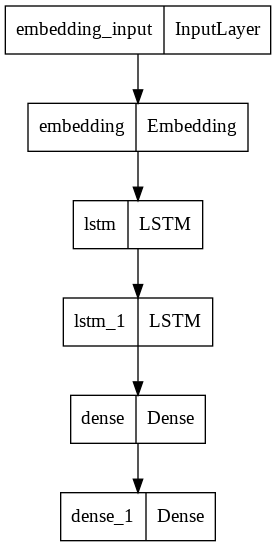

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
# compile network
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(train_inputs,train_targets,epochs=150, batch_size=64, callbacks=[checkpoint, reduce, es],verbose=1)
model.save("mymodel.h5")

Epoch 1/150
83/87 [===========================>..] - ETA: 0s - loss: 6.5650 - accuracy: 0.1229
Epoch 1: loss improved from 7.10903 to 6.56416, saving model to nextword1.h5
87/87 [==============================] - 5s 18ms/step - loss: 6.5642 - accuracy: 0.1229 - lr: 0.0010
Epoch 2/150
86/87 [============================>.] - ETA: 0s - loss: 6.2973 - accuracy: 0.1261
Epoch 2: loss improved from 6.56416 to 6.29513, saving model to nextword1.h5
87/87 [==============================] - 1s 17ms/step - loss: 6.2951 - accuracy: 0.1263 - lr: 0.0010
Epoch 3/150
83/87 [===========================>..] - ETA: 0s - loss: 6.0517 - accuracy: 0.1314
Epoch 3: loss improved from 6.29513 to 6.05179, saving model to nextword1.h5
87/87 [==============================] - 1s 17ms/step - loss: 6.0518 - accuracy: 0.1310 - lr: 0.0010
Epoch 4/150
85/87 [============================>.] - ETA: 0s - loss: 5.7658 - accuracy: 0.1344
Epoch 4: loss improved from 6.05179 to 5.77075, saving model to nextword1.h5
87/87 [==

In [ ]:
from keras_preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, padding='pre', truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
  pred_word = tokenizer.index_word[i]
  print("Next word suggestion:",pred_word)

he found himself
[13, 839, 42] [[839  42]]
1/1 [==============================] - 0s 16ms/step
Next word suggestion: sections
Next word suggestion: excusal
Next word suggestion: contract


#### 8. Are there languages that are harder or easier to stem than English? What linguistic structures affect this?

Finnish, German, Icelandic, Arabic etc. 
For instance :
detecting regular changes of the stem (e.g. 'Haus' and 'Häuser' in German 
detecting glued characters (e.g. 'essen' and 'gegessen') 
detecting irregular chages of teh stem (e.g. 'nehmen' and 'genommen') 
The German language makes heavy use of compound nouns. E.g. the German term for "nuclear power plan" is "Atomkraftwerk" and the room the director of nuclear power plant works in would be "Atomkraftwerksdirektorenzimmer".
for example, the word götusópari ‘street sweeper’ which is a com- pound made of the genitive of the noun gata ‘street’ and a noun derived from the verb sópa, using the affix -ari ‘one who does what the verb expresses’ (sim- ilar to the English -er). The masculine noun götusópari does not appear in the 590K word IFD corpus nor does the noun sópari ‘sweeper’. On the other hand, the neuter noun pari (dative form of par ‘pair’) does exist in the corpus. Using longest match analysis for unknown words results in the incorrect lemma götusó- par, while the correct result would be an unmodified götusópari.
 Consider, for example, the feminine plural noun álfelgur ‘alumininum rims’. Even if our lemmatizer recognizes the parts ál ‘aluminium’ and felgur ‘rims’ it might mistake the ál-felgur compound for álf-elgur ‘elf moose’, because of compound ambiguity.

#### 9. Are there languages in which even segmentation (splitting a paragraph into sentences and sentences into words) is challenging?


Thai sentences consist of many words that are written consecutively with compli- cated rules that make word segmentation to be an arduous task.
1. The vowels ะ,า,◌ิ,◌ี,◌ึ,◌ื,◌ุ,◌ู,◌็,◌ํา,◌ั, and tonal marks must have at least one preceding consonant.
2. The vowels เ, แ, ไ, and โ always be the first letter of a syllable except with leading consonants.
3. The vowel ใ always the first letter of a syllable.
4. The consonants ฉ [tɕh], ผ [ph], ฝ [f], ฮ [h] always be the first consonants except
in the case of preceding by the vowels เ, แ, ไ, ใ, or โ.
5. Theconsonantsศ[s],ณ[n],ญ[j],ษ[s],ฐ[th],ฎ[d],ฏ[t],ฒ[th],ฬ[l],ฌ[tɕh]
always be a final consonant except for some syllables, such as ศก [sòk], ณรงค์
[ná-roŋ], ญวน [juan], ศพ [sòp], ศตวรรษ [sà-tà-wat], etc.
6. The vowel ◌ึ [ɯ] always followed by a final consonant except for the syllables:
รึ [rɯ], หึ [hɯ], ฮึ [hɯ].
7. The vowel ◌ั [a] always follows a consonant.
8. The vowels อ [ʔ], and ◌ํา [ʔam] always follows a consonant.
Also, in traditional Thai writing system, punctuation and space is not used. Therefore, the segmentation poses a great challanges when it comes to NLP analysis. Besides Thai, languages such as traditional Chinese text (not traditional Chinese characters), Tamil, Hindi, Sanskrit, Mayan, Hiroglyphics, Runes, Old Norse, Old Church Slavonic, Gothic, Old English, Old German, Ancient Greek, etc. are having the same issues. 